# Customer Analytics - Purchase Predictive Analysis

Author: Barkamol Urinboev

## Purchase Descriptive Analysis

In [1]:
import numpy as np
import pandas as pd

# WTo segment our new data. We'll need scaler, pca and k-means.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle
# Logistic Regression module for the purchase probability model.
from sklearn.linear_model import LogisticRegression 
# For visualization
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()
# Linear Regression module for the quantity model.
from sklearn.linear_model import LinearRegression

## Data Preparation

In [2]:
# Load data
df_purchase = pd.read_csv('purchase data.csv')
# Import Scaler
scaler = pickle.load(open('scaler.pickle', 'rb'))
# Import PCA
pca = pickle.load(open('pca.pickle', 'rb'))
# Import K-Means
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))
# Standardization
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
# Apply PCA
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
# Segment data
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)
#Create a copy of the dataframe
df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

## Purchase Probability Model

In [3]:
# Y is Incidence, as we want to predict the purchase probability for our customers
Y = df_pa['Incidence']

In [4]:
# Dependant variable is based on the average price of chocolate candy bars. 
# X is a data frame, containing the mean across the five prices.
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5']) / 5

In [5]:
# Create a Logistic Regression model
# Fit the model with our X or price and our Y or incidence
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X,Y)

LogisticRegression(solver='sag')

In [6]:
# The coefficients for price
# Negative signals that with an increase in price, the purchase probability decreases.
model_purchase.coef_

array([[-2.34835501]])

## Price Elasticity of Purchase Probability

In [7]:
# The prices for the five different brands, which is an important factor in determining purchase probability. 
# It informs the price range, for which we will be exploring purchase probability.
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.140000,2.260000,2.800000


In [8]:
# Price range for which we'll examine the purchase probability.
# Choose a price range between 0.5 and 3.49, 
#  which somewhat expands the actual observed price range, 
#  which is from 1.1 to 2.8. 
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [9]:
df_price_range = pd.DataFrame(price_range)

In [10]:
# Predict the purchase probability for our newly defined price range. 
# The result is a 2x300  array. 
# The first column shows the probability for not purchasing the product, 
# the second the probability for purchase for each price point in our price range.
Y_pr = model_purchase.predict_proba(df_price_range)
purchase_pr = Y_pr[:][:, 1]

# Elasticity = beta*price*(1-P(purchase))
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

C:\Users\barka\anaconda3\envs\Deep_Learning_modul\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [11]:
# Create price elasticities master data frame, rename column name and 'Mean_PE' column equal pe
df_price_elasticities = pd.DataFrame(price_range)
df_price_elasticities = df_price_elasticities.rename(columns = {0: 'Price_Point'})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096409
1,0.51,-0.100478
2,0.52,-0.104674
3,0.53,-0.109000
4,0.54,-0.113459
...,...,...
295,3.45,-8.014000
296,3.46,-8.039252
297,3.47,-8.064469
298,3.48,-8.089652


In [12]:
# If you would like see all raw, run this cell  
#pd.option.display.max_rows = None
#df_price_elasticities

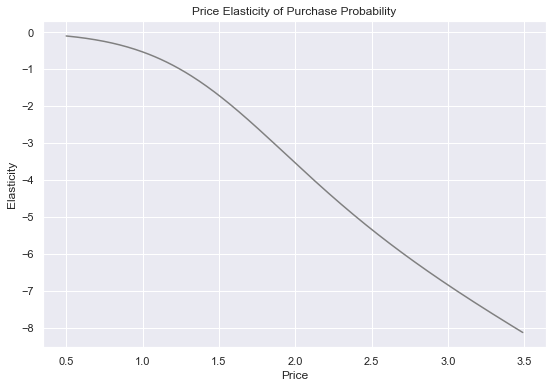

In [13]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.show()

#### 🔶 Insights 
- With prices lower than 1.25, we can increase our product price without losing too much in terms of purchase probability.
- For prices higher than 1.25, We have more to gain by reducing our prices.

## Segment 1 - `Career- Focused`

In [14]:
# Select only
df_pa_segment_1  = df_pa[df_pa['Segment'] == 1]

# Build logistic regression model
Y = df_pa_segment_1['Incidence']

X = pd.DataFrame()

# Calculate avarage price for candy bars
X['Mean_Price'] = (df_pa_segment_1['Price_1'] +
                   df_pa_segment_1['Price_2'] +
                   df_pa_segment_1['Price_3'] +
                   df_pa_segment_1['Price_4'] +
                   df_pa_segment_1['Price_5']) / 5

model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

# Calculate elasticities
model_incidence_segment_1.coef_

Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]

# Elasticity = beta*price*(1-P(purchase))
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

C:\Users\barka\anaconda3\envs\Deep_Learning_modul\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Result

In [15]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1
0,0.50,-0.096409,-0.119095
1,0.51,-0.100478,-0.123278
2,0.52,-0.104674,-0.127554
3,0.53,-0.109000,-0.131925
4,0.54,-0.113459,-0.136393
...,...,...,...
295,3.45,-8.014000,-5.680578
296,3.46,-8.039252,-5.700734
297,3.47,-8.064469,-5.720853
298,3.48,-8.089652,-5.740936


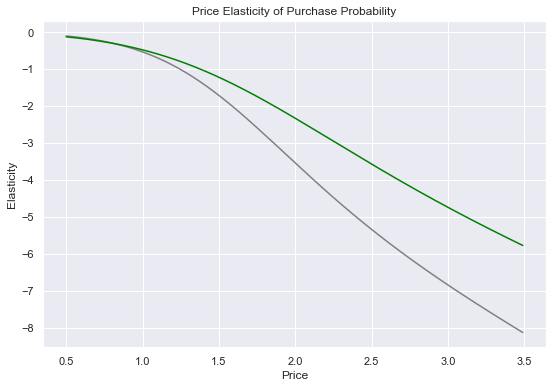

In [16]:
# Visualization 
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.show()

## Segment 2 - `Fewer - Opporunities`

In [17]:
# Select only
df_pa_segment_2  = df_pa[df_pa['Segment'] == 2]

# Build logistic regression model
Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()

# Calculate avarage price for candy bars
X['Mean_Price'] = (df_pa_segment_2['Price_1'] +
                   df_pa_segment_2['Price_2'] +
                   df_pa_segment_2['Price_3'] +
                   df_pa_segment_2['Price_4'] +
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment_2 = LogisticRegression(solver = 'sag')
model_incidence_segment_2.fit(X, Y)

# Calculate elasticities
model_incidence_segment_2.coef_

Y_segment_2 = model_incidence_segment_2.predict_proba(df_price_range)
purchase_pr_segment_2 = Y_segment_2[:][:, 1]

# Elasticity = beta*price*(1-P(purchase))
pe_segment_2 = model_incidence_segment_2.coef_[:, 0] * price_range * (1 - purchase_pr_segment_2)

C:\Users\barka\anaconda3\envs\Deep_Learning_modul\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Result

In [18]:
df_price_elasticities['PE_Segment_2'] = pe_segment_2
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2
0,0.50,-0.096409,-0.119095,-0.031165
1,0.51,-0.100478,-0.123278,-0.032947
2,0.52,-0.104674,-0.127554,-0.034817
3,0.53,-0.109000,-0.131925,-0.036778
4,0.54,-0.113459,-0.136393,-0.038835
...,...,...,...,...
295,3.45,-8.014000,-5.680578,-12.557189
296,3.46,-8.039252,-5.700734,-12.594141
297,3.47,-8.064469,-5.720853,-12.631076
298,3.48,-8.089652,-5.740936,-12.667996


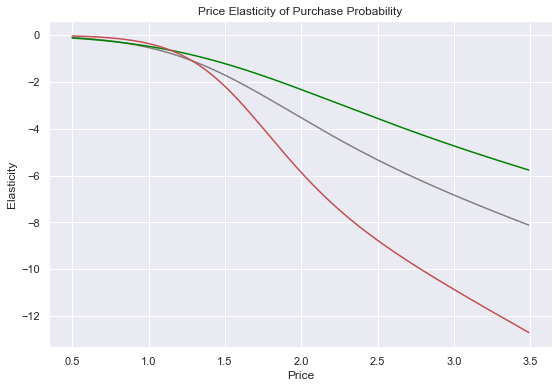

In [19]:
# Visualization 
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment_2, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.show()

## Segment 3 - `Well-Off`

In [20]:
# Select only
df_pa_segment_3  = df_pa[df_pa['Segment'] == 3]

# Build logistic regression model
Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()

# Calculate avarage price for candy bars
X['Mean_Price'] = (df_pa_segment_3['Price_1'] +
                   df_pa_segment_3['Price_2'] +
                   df_pa_segment_3['Price_3'] +
                   df_pa_segment_3['Price_4'] +
                   df_pa_segment_3['Price_5']) / 5

model_incidence_segment_3 = LogisticRegression(solver = 'sag')
model_incidence_segment_3.fit(X, Y)

# Calculate elasticities
model_incidence_segment_3.coef_

Y_segment_3 = model_incidence_segment_3.predict_proba(df_price_range)
purchase_pr_segment_3 = Y_segment_3[:][:, 1]

# Elasticity = beta*price*(1-P(purchase))
pe_segment_3 = model_incidence_segment_3.coef_[:, 0] * price_range * (1 - purchase_pr_segment_3)

C:\Users\barka\anaconda3\envs\Deep_Learning_modul\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
print(X.shape)
print(Y.shape)

(11495, 1)
(11495,)


## Results

In [22]:
df_price_elasticities['PE_Segment_3'] = pe_segment_3
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3
0,0.50,-0.096409,-0.119095,-0.031165,-0.167835
1,0.51,-0.100478,-0.123278,-0.032947,-0.172752
2,0.52,-0.104674,-0.127554,-0.034817,-0.177739
3,0.53,-0.109000,-0.131925,-0.036778,-0.182797
4,0.54,-0.113459,-0.136393,-0.038835,-0.187925
...,...,...,...,...,...
295,3.45,-8.014000,-5.680578,-12.557189,-4.016299
296,3.46,-8.039252,-5.700734,-12.594141,-4.031154
297,3.47,-8.064469,-5.720853,-12.631076,-4.045993
298,3.48,-8.089652,-5.740936,-12.667996,-4.060816


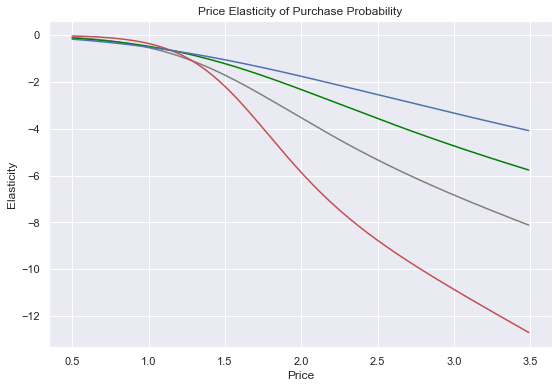

In [23]:
# Visualization 
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment_2, color = 'r')
plt.plot(price_range, pe_segment_3, color = 'b')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.show()

## Segment 4 - `Standard`

In [24]:
# Select only
df_pa_segment_4  = df_pa[df_pa['Segment'] == 0]

# Build logistic regression model
Y = df_pa_segment_4['Incidence']

X = pd.DataFrame()

# Calculate avarage price for candy bars
X['Mean_Price'] = (df_pa_segment_4['Price_1'] +
                   df_pa_segment_4['Price_2'] +
                   df_pa_segment_4['Price_3'] +
                   df_pa_segment_4['Price_4'] +
                   df_pa_segment_4['Price_5']) / 5

model_incidence_segment_4 = LogisticRegression(solver = 'sag')
model_incidence_segment_4.fit(X, Y)

# Calculate elasticities
model_incidence_segment_4.coef_

Y_segment_4 = model_incidence_segment_4.predict_proba(df_price_range)
purchase_pr_segment_4 = Y_segment_4[:][:, 1]

# Elasticity = beta*price*(1-P(purchase))
pe_segment_4 = model_incidence_segment_4.coef_[:, 0] * price_range * (1 - purchase_pr_segment_4)

C:\Users\barka\anaconda3\envs\Deep_Learning_modul\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Results

In [25]:
df_price_elasticities['PE_Segment_4'] = pe_segment_4
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_4
0,0.50,-0.096409,-0.119095,-0.031165,-0.167835,-0.212072
1,0.51,-0.100478,-0.123278,-0.032947,-0.172752,-0.218669
2,0.52,-0.104674,-0.127554,-0.034817,-0.177739,-0.225374
3,0.53,-0.109000,-0.131925,-0.036778,-0.182797,-0.232188
4,0.54,-0.113459,-0.136393,-0.038835,-0.187925,-0.239112
...,...,...,...,...,...,...
295,3.45,-8.014000,-5.680578,-12.557189,-4.016299,-5.057582
296,3.46,-8.039252,-5.700734,-12.594141,-4.031154,-5.074441
297,3.47,-8.064469,-5.720853,-12.631076,-4.045993,-5.091282
298,3.48,-8.089652,-5.740936,-12.667996,-4.060816,-5.108104


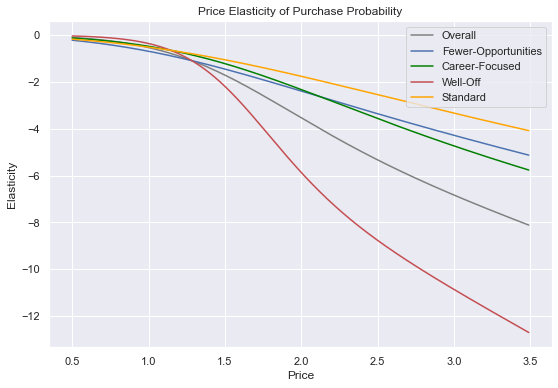

In [28]:
# Visualization 
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_4, color = 'b')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment_2, color = 'r')
plt.plot(price_range, pe_segment_3, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.legend(['Overall','Fewer-Opportunities','Career-Focused',
            'Well-Off','Standard'], loc = 1)
plt.show()

## Purchase Probability with Promotion Feature

### Data Preparation

In [29]:
# Select only

# Build logistic regression model
Y = df_pa['Incidence']

X = pd.DataFrame()

# Calculate avarage price for candy bars
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5']) / 5

# Calculate avarage promotion for candy bars
X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5']) / 5

## Model Estimation

In [30]:
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
# Calculate elasticities
model_incidence_promotion.coef_

array([[-1.49413028,  0.56144601]])

## Price Elasticity with Promotion

In [31]:
# Create a data frame on which our model will predict. 
# Include a price and promotion feature.
# Include the price range as the price feature. 
# Include the promotion feature.
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = \
df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})

In [32]:
# Calculate price elasticities of purchase probability 
#   when we assume there is a promotion across at each price points.
df_price_elasticity_promotion['Promotion'] = 1
df_price_elasticity_promotion

,Price_Range,Promotion
0,0.50,1
1,0.51,1
2,0.52,1
3,0.53,1
4,0.54,1
...,...,...
295,3.45,1
296,3.46,1
297,3.47,1
298,3.48,1


In [33]:
# Purchase Probability with Promotion Model Prediction
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

C:\Users\barka\anaconda3\envs\Deep_Learning_modul\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price_Range
- Promotion
Feature names seen at fit time, yet now missing:
- Mean_Price
- Mean_Promotion

  warnings.warn(message, FutureWarning)


In [34]:
promo = Y_promotion[:, 1]

#Elasticity
price_elasticity_promo = \
(model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [35]:
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_4,Elasticity_Promotion_1
0,0.50,-0.096409,-0.119095,-0.031165,-0.167835,-0.212072,-0.125740
1,0.51,-0.100478,-0.123278,-0.032947,-0.172752,-0.218669,-0.129857
2,0.52,-0.104674,-0.127554,-0.034817,-0.177739,-0.225374,-0.134052
3,0.53,-0.109000,-0.131925,-0.036778,-0.182797,-0.232188,-0.138328
4,0.54,-0.113459,-0.136393,-0.038835,-0.187925,-0.239112,-0.142684
...,...,...,...,...,...,...,...
295,3.45,-8.014000,-5.680578,-12.557189,-4.016299,-5.057582,-4.862044
296,3.46,-8.039252,-5.700734,-12.594141,-4.031154,-5.074441,-4.880247
297,3.47,-8.064469,-5.720853,-12.631076,-4.045993,-5.091282,-4.898419
298,3.48,-8.089652,-5.740936,-12.667996,-4.060816,-5.108104,-4.916561


In [36]:
# Calculate price elasticities of purchase probability 
#   when we assume there is a promotion across at each price points.
df_price_elasticity_promotion['Promotion'] = 0
df_price_elasticity_promotion

,Price_Range,Promotion
0,0.50,0
1,0.51,0
2,0.52,0
3,0.53,0
4,0.54,0
...,...,...
295,3.45,0
296,3.46,0
297,3.47,0
298,3.48,0


In [37]:
# Purchase Probability with Promotion Model Prediction
Y_promotion = \
model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

C:\Users\barka\anaconda3\envs\Deep_Learning_modul\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price_Range
- Promotion
Feature names seen at fit time, yet now missing:
- Mean_Price
- Mean_Promotion

  warnings.warn(message, FutureWarning)


In [38]:
promo = Y_promotion[:, 1]

#Elasticity
price_elasticity_no_promo = \
(model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [39]:
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_4,Elasticity_Promotion_1,Elasticity_Promotion_0
0,0.50,-0.096409,-0.119095,-0.031165,-0.167835,-0.212072,-0.125740,-0.195646
1,0.51,-0.100478,-0.123278,-0.032947,-0.172752,-0.218669,-0.129857,-0.201767
2,0.52,-0.104674,-0.127554,-0.034817,-0.177739,-0.225374,-0.134052,-0.207991
3,0.53,-0.109000,-0.131925,-0.036778,-0.182797,-0.232188,-0.138328,-0.214319
4,0.54,-0.113459,-0.136393,-0.038835,-0.187925,-0.239112,-0.142684,-0.220750
...,...,...,...,...,...,...,...,...
295,3.45,-8.014000,-5.680578,-12.557189,-4.016299,-5.057582,-4.862044,-4.983620
296,3.46,-8.039252,-5.700734,-12.594141,-4.031154,-5.074441,-4.880247,-5.000528
297,3.47,-8.064469,-5.720853,-12.631076,-4.045993,-5.091282,-4.898419,-5.017415
298,3.48,-8.089652,-5.740936,-12.667996,-4.060816,-5.108104,-4.916561,-5.034282


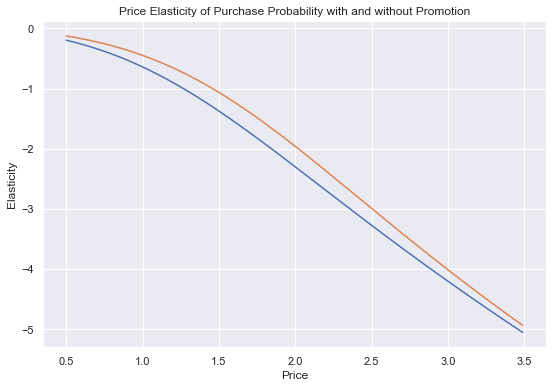

In [40]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')
plt.show()

### 🔶 Insights 
- The purchase probability elasticity of the customer is less elastic when there is promotion.
- This is an important insight for marketers, as according to our model people are more likely to buy a product if there is some promotional activity rather than purchase a product with the same price, when it isn't on promotion

## Brand Choice 

### Data Preparation

In [41]:
# To determine the brand choice of the customer. 
# Filter our data, include only purchase occasion 
brand_choice = df_pa[df_pa['Incidence'] == 1]

In [42]:
# If you would like see hundred rows, run this cell
# pd.options.display.max_rows = 100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,2,0,0,1,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,2,0,0,1,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,2,0,0,1,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,2,0,0,1,0


In [43]:
# Set the dependent variable
Y = brand_choice['Brand']

In [44]:
# Check and decide which features to include for prediction.
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype=object)

In [45]:
# Predict based on the prices for the five brands
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4','Price_5']
X = brand_choice[features]

In [46]:
# Brand Choice Model fit.
model_brand_choice = LogisticRegression(solver = 'sag', 
                                        multi_class = 'multinomial')
model_brand_choice.fit(X, Y)

LogisticRegression(multi_class='multinomial', solver='sag')

In [47]:
model_brand_choice.coef_

array([[-3.9159678 ,  0.65845957,  2.41768168,  0.70407863, -0.20211891],
       [ 1.27460911, -1.87985545, -0.21265466, -0.2063433 ,  0.5878686 ],
       [ 1.62420942,  0.56211013,  0.5009514 ,  1.03952129,  0.45280371],
       [ 0.57453285,  0.39558755, -1.40061901, -1.2462467 ,  0.2493483 ],
       [ 0.44261642,  0.2636982 , -1.30535941, -0.29100992, -1.0879017 ]])

In [48]:
# Create a pandas data frame, which contains to coefficients
#  to be reader-friendly
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915968,0.658460,2.417682,0.704079,-0.202119
1,1.274609,-1.879855,-0.212655,-0.206343,0.587869
2,1.624209,0.562110,0.500951,1.039521,0.452804
3,0.574533,0.395588,-1.400619,-1.246247,0.249348
4,0.442616,0.263698,-1.305359,-0.291010,-1.087902


In [49]:
# To increase readability:
#  transpose the data frame, to keep with the conventional representation of results.
#  add labels for the columns and the index, which represent the coefficients of the brands and prices, respectively. 
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


Interpretation: each coefficient shows how the price change would affect the probability of choosing the relative brand. In general, brand choice probability goes up if its own price is lower and other brands' prices are higher.

## Own Price Elasticity Brand 5

In [50]:
# To calculate price elasticity of brand choice
# Create a data frame with price columns, 
#  which our model will use to predict the brand choice probabilities.
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [51]:
# Brand Choice Model prediction
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)
# Model returns the probabilities of choosing each of the 5 brands. 
# Only interested in the probability for the fifth brand
pr_own_brand_5 = predict_brand_5[: ][:, 4]

In [52]:
# Choosing brand 5. 
# Get brand 5 coefficient and price 5
beta5 = bc_coef.iloc[4 , 4]
# Calculating price elasticities for brand choice without promotion
own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5)


In [53]:
df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5
#pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_4,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5
0,0.50,-0.096409,-0.119095,-0.031165,-0.167835,-0.212072,-0.125740,-0.195646,-0.049056
1,0.51,-0.100478,-0.123278,-0.032947,-0.172752,-0.218669,-0.129857,-0.201767,-0.050617
2,0.52,-0.104674,-0.127554,-0.034817,-0.177739,-0.225374,-0.134052,-0.207991,-0.052207
3,0.53,-0.109000,-0.131925,-0.036778,-0.182797,-0.232188,-0.138328,-0.214319,-0.053827
4,0.54,-0.113459,-0.136393,-0.038835,-0.187925,-0.239112,-0.142684,-0.220750,-0.055478
...,...,...,...,...,...,...,...,...,...
295,3.45,-8.014000,-5.680578,-12.557189,-4.016299,-5.057582,-4.862044,-4.983620,-3.231572
296,3.46,-8.039252,-5.700734,-12.594141,-4.031154,-5.074441,-4.880247,-5.000528,-3.247766
297,3.47,-8.064469,-5.720853,-12.631076,-4.045993,-5.091282,-4.898419,-5.017415,-3.263928
298,3.48,-8.089652,-5.740936,-12.667996,-4.060816,-5.108104,-4.916561,-5.034282,-3.280057


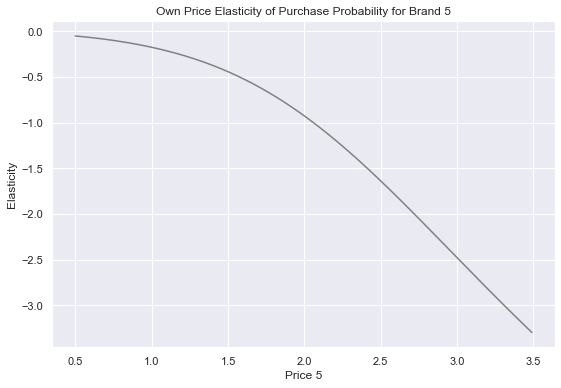

In [54]:
# Plot elasticities of purchase probability for brand 5.
plt.figure(figsize = (9, 6))
plt.plot(price_range, own_price_elasticity_brand_5, color = 'grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')
plt.show()


## Cross Price Elasticity Brand 5, Cross Brand 4

In [55]:
# To examine the effect of the changes in price of a competitor brand.
# The brand which comes closest to brand 5 is brand 4. 
# - Need to examine changes in the price of this brand.
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()

In [56]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [57]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]

In [58]:
beta5

-1.09

In [59]:
# To calculate the cross brand price elasticity (with new formula)
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4

df_price_elasticities['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_4,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096409,-0.119095,-0.031165,-0.167835,-0.212072,-0.125740,-0.195646,-0.049056,0.332011
1,0.51,-0.100478,-0.123278,-0.032947,-0.172752,-0.218669,-0.129857,-0.201767,-0.050617,0.337288
2,0.52,-0.104674,-0.127554,-0.034817,-0.177739,-0.225374,-0.134052,-0.207991,-0.052207,0.342507
3,0.53,-0.109000,-0.131925,-0.036778,-0.182797,-0.232188,-0.138328,-0.214319,-0.053827,0.347669
4,0.54,-0.113459,-0.136393,-0.038835,-0.187925,-0.239112,-0.142684,-0.220750,-0.055478,0.352773
...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.014000,-5.680578,-12.557189,-4.016299,-5.057582,-4.862044,-4.983620,-3.231572,0.162234
296,3.46,-8.039252,-5.700734,-12.594141,-4.031154,-5.074441,-4.880247,-5.000528,-3.247766,0.160334
297,3.47,-8.064469,-5.720853,-12.631076,-4.045993,-5.091282,-4.898419,-5.017415,-3.263928,0.158448
298,3.48,-8.089652,-5.740936,-12.667996,-4.060816,-5.108104,-4.916561,-5.034282,-3.280057,0.156576


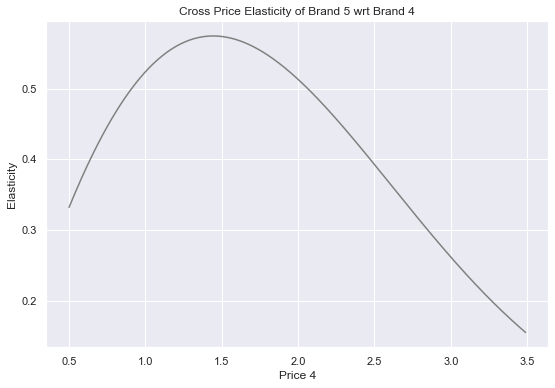

In [60]:
# Examine the cross price elasticity of purchase probability for 
#  brand 5 vs brand 4.

plt.figure(figsize = (9, 6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color = 'grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt Brand 4')
plt.show()

### 🔶 Insights 
- Brand 4 is a strong substitute for brand 5 for all prices up to $1.65
- Note: the observed price range of brand 4 lies between 2.6 in this region
- These prices are out of the natural domain of brand 4, therefore if brand 4 had a substantially lower price it would be a very strong competitor a brand 5
- Even though the elasticity starts to decrease from the 1.45 mark, it is still positive, signaling that the increase in purchase probability for brand 5 happens more slowly.
- When it comes to average customer, brand 4 is a weak substitute for brand 5
- Brand 5 can create a marketing strategy targeting customers who choose brand 4, and attract them to buy own brand 5

### Own and Cross-Price Elasticity by Segment

### $\color{orange}{\text{Well-Off}}$

In [61]:
# Analyze the purchase probability for choosing brand 5 by segments.
# Filter our data
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]
# If you would like see hundred rows, run this code                                  
#pd.options.display.max_rows = 100
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,52,2,159052,2,1,3,0,0,0,1
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,52,2,159052,2,1,3,0,0,0,1
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,52,2,159052,2,1,3,0,0,0,1
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,52,2,159052,2,1,3,0,0,0,1
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,52,2,159052,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,4,1,1.50,1.87,2.06,...,44,2,193816,2,1,3,0,0,0,1
57347,200000489,693,1,4,2,4,1,1.42,1.51,2.02,...,44,2,193816,2,1,3,0,0,0,1
57348,200000489,701,1,4,3,4,1,1.42,1.85,1.99,...,44,2,193816,2,1,3,0,0,0,1
57350,200000489,715,1,4,2,0,0,1.50,1.80,2.09,...,44,2,193816,2,1,3,0,0,0,1


In [62]:
# Brand Choice Model estimation.
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features] #Price_1 - Price_5
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

# Coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients] #Naming columns
bc_coef.index = [prices] #Naming indices
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.15,1.33,0.82,0.12,-0.11
Price_2,-0.96,-1.38,1.29,0.78,0.27
Price_3,2.01,-1.65,-0.49,0.03,0.11
Price_4,2.52,0.96,-0.25,-1.90,-1.33
Price_5,-0.99,-0.30,1.17,0.56,-0.44


### $\color{orange}{\text{Own-Brand Price Elasticity}}$

In [63]:
# Calculating own-brand price elasticity for brand 5 and the Well-off segment.
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

### $\color{orange}{\text{Cross-Brand Price Elasticity}}$

In [64]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Well-off segment.
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

# Update master data frame to include the newly obtained cross-brand price elasticities.
brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
#pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_4,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096409,-0.119095,-0.031165,-0.167835,-0.212072,-0.125740,-0.195646,-0.049056,0.332011,-0.297328,0.482421
1,0.51,-0.100478,-0.123278,-0.032947,-0.172752,-0.218669,-0.129857,-0.201767,-0.050617,0.337288,-0.303374,0.491726
2,0.52,-0.104674,-0.127554,-0.034817,-0.177739,-0.225374,-0.134052,-0.207991,-0.052207,0.342507,-0.309431,0.501016
3,0.53,-0.109000,-0.131925,-0.036778,-0.182797,-0.232188,-0.138328,-0.214319,-0.053827,0.347669,-0.315498,0.510290
4,0.54,-0.113459,-0.136393,-0.038835,-0.187925,-0.239112,-0.142684,-0.220750,-0.055478,0.352773,-0.321576,0.519548
...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.014000,-5.680578,-12.557189,-4.016299,-5.057582,-4.862044,-4.983620,-3.231572,0.162234,-3.337316,0.157490
296,3.46,-8.039252,-5.700734,-12.594141,-4.031154,-5.074441,-4.880247,-5.000528,-3.247766,0.160334,-3.350646,0.152068
297,3.47,-8.064469,-5.720853,-12.631076,-4.045993,-5.091282,-4.898419,-5.017415,-3.263928,0.158448,-3.363973,0.146811
298,3.48,-8.089652,-5.740936,-12.667996,-4.060816,-5.108104,-4.916561,-5.034282,-3.280057,0.156576,-3.377297,0.141716


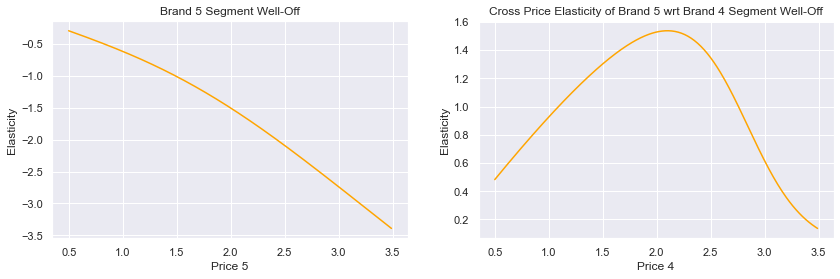

In [65]:
# Using a figure with axes we plot the own brand and cross-brand price elasticities for brand 5 cross brand 4 side by side.
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

### $\color{blue}{\text{Standard}}$

In [66]:
# Here we are interesting in analysing the brand choice probability of the Standard segment.
# We filter our data, by selecting only purchases from segment 0.
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment'] == 0]
brand_choice_s0.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
2398,200000024,44,1,2,2,0,0,1.35,1.58,1.97,...,32,1,88428,0,0,0,1,0,0,0
2403,200000024,98,1,2,2,0,0,1.47,1.90,1.95,...,32,1,88428,0,0,0,1,0,0,0
2408,200000024,143,1,2,3,0,0,1.21,1.35,1.99,...,32,1,88428,0,0,0,1,0,0,0
2410,200000024,162,1,2,5,0,0,1.39,1.90,1.94,...,32,1,88428,0,0,0,1,0,0,0
2417,200000024,217,1,5,1,0,0,1.34,1.89,1.99,...,32,1,88428,0,0,0,1,0,0,0


In [67]:
# Brand Choice Model estimation.
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_s0.fit(X, Y)

# Coefficients table segment 0.
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{blue}{\text{Own-Brand Price Elasticity}}$

In [68]:
# Calculating own-brand price elasticity for brand 5 and the Standard segment.
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

# Compute price elasticities and update master data frame.
# We'd like to include the elasticities for the segments in order from 0 to three, which is why we use insert() on position 10.
own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities.insert(10, column = 'Brand 5 S0', value = own_price_elasticity_brand_5_s0)

### $\color{blue}{\text{Cross-Brand Price Elasticity}}$

In [69]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Standard segment.
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

# Compute price elasticities and update master data frame.
# We need to use insert() on position 11, to save the price elasticities in the correct order.
brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities.insert(11, column = 'Brand_5_Cross_Brand_4_S0', value = brand5_cross_brand4_price_elasticity_s0)

### $\color{green}{\text{Career-Focused}}$

In [70]:
# Filter data by the Career-focused segment, which is the first segment.
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment'] == 1]

In [71]:
# Brand Choice Model estimation.
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

# Coefficients table segment 1
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{green}{\text{Own-Brand Price Elasticity}}$

In [72]:
# Calculating own-brand price elasticity for brand 5 and the Career-focused segment.
df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

### $\color{green}{\text{Cross-Brand Price Elasticity}}$

In [73]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Career-focused segment.
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', value = brand5_cross_brand4_price_elasticity_s1)

### $\color{red}{\text{Fewer-opportunities}}$

In [74]:
# Filter data, select only purchases from segment 2, which is the Fewer-Opportunities segment..
brand_choice_s2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s2 = brand_choice_s2[brand_choice_s2['Segment'] == 2]

In [75]:
# Brand Choice Model estimation.
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s2.fit(X, Y)

# Coefficients table segment 2
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{red}{\text{Own-Brand Price Elasticity}}$

In [76]:
# Calculating own-brand price elasticity for brand 5 and the Fewer-opportunities segment.
df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities.insert(12, column = 'Brand 5 S2', value = own_price_elasticity_brand_5_s2)

### $\color{red}{\text{Cross-Brand Price Elasticity}}$

In [77]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand
df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S2', value = brand5_cross_brand4_price_elasticity_s2)

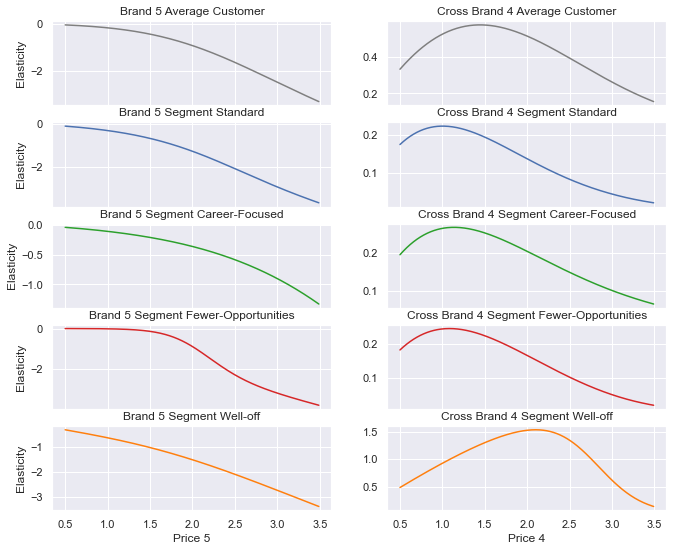

In [79]:
# We plot the own and cross brand price elasticities for the average customer and each of the four segments.
# We can observe differences and similiraties between the segments and examine their preference, when it comes to brand choice.
# The two segments, which seem to be of most interested for the marketing team of brand 5, seem to be the Career-focused
# and the Well-off. They are also the segments which purchase this brand most often. 
# The Career-focused segment is the most inelastic and they are the most loyal segment. 
# Based on our model, they do not seem to be that affected by price, therefore brand 5 could increase its price, 
# without fear of significant loss of customers from this segment. 
# The Well-off segment on the other hand, seems to be more elastic. They also purchase the competitor brand 4 most often.
# In order to target this segment, our analysis signals, that price needs to be decreased. However, keep in mind 
# that other factors aside from price might be influencing the purchase behaivour of this segment.
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0)
ax2[0].set_title('Brand 5 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0)
ax2[1].set_title('Cross Brand 4 Segment Standard')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4')
plt.show()

### 🔶 Insights 
- Brand 5 should decrease its own price offering while gaining solid market share from the well-off and retaining the career-focused segment, the most frequent buyers of brand 5

- For Career-focused segment, Brand 5 could increase its price, without fear of significant loss of customers from this segment
- The Career-focused segment is the most inelastic and they do not seem to be that affected by price
- The cross price elasticity also has extremely low values, meaning they are unlikely to switch to brand 4
- For the Well-off segment, we'd better decrease brand 5 price to gain market share from this segment
- For this segment, own elasticity is much higher than 'career-focused'
- They also purchase the competitor brand 4 most often by having highest cross brand elasticity, meaning a tiny increase in price will lose customers

## Price Elasticility of Purchase Quantity

In [89]:
# We want to determine price elasticity of purchase quantity, also known as price elasticity of demand.
# We are interested in purchase ocassion, where the purchased quantity is different from 0.
# Therefore, once again we filter our data to contain only shopping visits where the client has purchased at least one product.
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0


In [90]:
# Create brand dummies, for each of the five brands.
df_purchase_quantity = \
pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')
# The descriptive analysis of the purchase quantitiy data frame, shows that quantity ranges from 1 to 15 
# and has an average value of 2.8, which means that more often than not our customers buy more than 1 chocolate candy bar.
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Segment,Segment_0,Segment_1,Segment_2,Segment_3,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,1.581910,0.175229,0.299290,0.293824,0.231657,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,1.028171,0.380176,0.457962,0.455528,0.421906,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
# Here we make a decission on which features to include in our model. We decide to include a Price and a Promotion feature.
df_purchase_quantity.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5'], dtype=object)

In [92]:
#Find the price of the product that is chosen at this incidence
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
                                           df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
                                           df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
                                           df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
                                           df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'])




In [99]:
#Find the promotion of the product that is chosen at this incidence
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
                                               df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
                                               df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
                                               df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
                                               df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'])

## Model Estimation. Linear Regression

In [101]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
X

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0
...,...,...
58621,1.89,0
58648,1.35,1
58674,1.85,1
58687,1.51,0


In [102]:
Y = df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [103]:
# Linear Regression Model
model_quantity = LinearRegression()
model_quantity.fit(X, Y)

LinearRegression()

In [104]:
# Linear Regression Model. The coefficients for price and promotion are both negative. 
# It appears that promotion reflects negatively on the purchase quantity of the average client, which is unexpected.
model_quantity.coef_

array([-0.8173651 , -0.10504673])

## Price Elasticity Estimation

In [105]:
# We examine the price elasticity of purchase quantity with active promotional activities for each price point.
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [107]:
#Take the coefficient for price.
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.8173651016685045

In [110]:
# We calculate the price elasticity with our new formula. It is the beta coefficient for price multiplied by price
# and divided by the purchase quantity.
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity


In [114]:
df_price_elasticities['PE_Quantity_Promotion_1'] = price_elasticity_quantity_promotion_yes
df_price_elasticities



,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_4,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1
0,0.50,-0.096409,-0.119095,-0.031165,-0.167835,-0.212072,-0.125740,-0.195646,-0.049056,0.332011,-0.115843,0.174123,-0.001036,0.181597,-0.043940,0.194774,-0.297328,0.482421,-0.102157
1,0.51,-0.100478,-0.123278,-0.032947,-0.172752,-0.218669,-0.129857,-0.201767,-0.050617,0.337288,-0.118882,0.176179,-0.001098,0.183894,-0.045027,0.197258,-0.303374,0.491726,-0.104413
2,0.52,-0.104674,-0.127554,-0.034817,-0.177739,-0.225374,-0.134052,-0.207991,-0.052207,0.342507,-0.121956,0.178183,-0.001163,0.186142,-0.046123,0.199691,-0.309431,0.501016,-0.106679
3,0.53,-0.109000,-0.131925,-0.036778,-0.182797,-0.232188,-0.138328,-0.214319,-0.053827,0.347669,-0.125066,0.180137,-0.001231,0.188341,-0.047228,0.202073,-0.315498,0.510290,-0.108954
4,0.54,-0.113459,-0.136393,-0.038835,-0.187925,-0.239112,-0.142684,-0.220750,-0.055478,0.352773,-0.128211,0.182040,-0.001303,0.190492,-0.048343,0.204405,-0.321576,0.519548,-0.111238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.014000,-5.680578,-12.557189,-4.016299,-5.057582,-4.862044,-4.983620,-3.231572,0.162234,-3.592452,0.024052,-3.746081,0.023406,-1.287425,0.068592,-3.337316,0.157490,-1.774292
296,3.46,-8.039252,-5.700734,-12.594141,-4.031154,-5.074441,-4.880247,-5.000528,-3.247766,0.160334,-3.606357,0.023696,-3.757523,0.022946,-1.297234,0.067969,-3.350646,0.152068,-1.788634
297,3.47,-8.064469,-5.720853,-12.631076,-4.045993,-5.091282,-4.898419,-5.017415,-3.263928,0.158448,-3.620217,0.023344,-3.768945,0.022493,-1.307098,0.067350,-3.363973,0.146811,-1.803124
298,3.48,-8.089652,-5.740936,-12.667996,-4.060816,-5.108104,-4.916561,-5.034282,-3.280057,0.156576,-3.634033,0.022997,-3.780347,0.022048,-1.317018,0.066736,-3.377297,0.141716,-1.817766


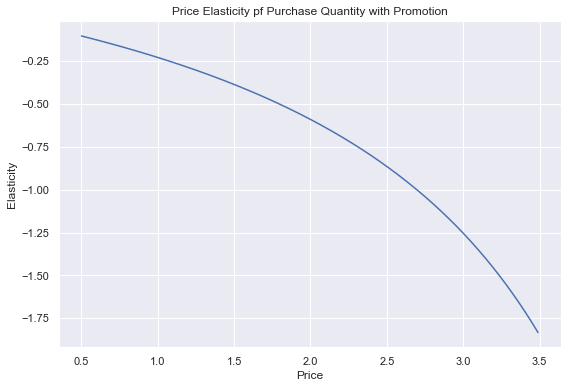

In [116]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity pf Purchase Quantity with Promotion')
plt.show()

## Price Elasticity without Promotion

In [117]:
# Overwrite promotion incidence in order to use the same df. 
# Here we assume there are no promotinal activities active for the entire price range.
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 0

In [118]:
# Find the new predicted quantities.
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)
# Calculate the new price elasticities.
price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity


In [119]:
# Add the results to the master data frame.
df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_4,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096409,-0.119095,-0.031165,-0.167835,-0.212072,-0.125740,-0.195646,-0.049056,0.332011,-0.115843,0.174123,-0.001036,0.181597,-0.043940,0.194774,-0.297328,0.482421,-0.102157,-0.099543
1,0.51,-0.100478,-0.123278,-0.032947,-0.172752,-0.218669,-0.129857,-0.201767,-0.050617,0.337288,-0.118882,0.176179,-0.001098,0.183894,-0.045027,0.197258,-0.303374,0.491726,-0.104413,-0.101736
2,0.52,-0.104674,-0.127554,-0.034817,-0.177739,-0.225374,-0.134052,-0.207991,-0.052207,0.342507,-0.121956,0.178183,-0.001163,0.186142,-0.046123,0.199691,-0.309431,0.501016,-0.106679,-0.103939
3,0.53,-0.109000,-0.131925,-0.036778,-0.182797,-0.232188,-0.138328,-0.214319,-0.053827,0.347669,-0.125066,0.180137,-0.001231,0.188341,-0.047228,0.202073,-0.315498,0.510290,-0.108954,-0.106150
4,0.54,-0.113459,-0.136393,-0.038835,-0.187925,-0.239112,-0.142684,-0.220750,-0.055478,0.352773,-0.128211,0.182040,-0.001303,0.190492,-0.048343,0.204405,-0.321576,0.519548,-0.111238,-0.108369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.014000,-5.680578,-12.557189,-4.016299,-5.057582,-4.862044,-4.983620,-3.231572,0.162234,-3.592452,0.024052,-3.746081,0.023406,-1.287425,0.068592,-3.337316,0.157490,-1.774292,-1.664290
296,3.46,-8.039252,-5.700734,-12.594141,-4.031154,-5.074441,-4.880247,-5.000528,-3.247766,0.160334,-3.606357,0.023696,-3.757523,0.022946,-1.297234,0.067969,-3.350646,0.152068,-1.788634,-1.677205
297,3.47,-8.064469,-5.720853,-12.631076,-4.045993,-5.091282,-4.898419,-5.017415,-3.263928,0.158448,-3.620217,0.023344,-3.768945,0.022493,-1.307098,0.067350,-3.363973,0.146811,-1.803124,-1.690246
298,3.48,-8.089652,-5.740936,-12.667996,-4.060816,-5.108104,-4.916561,-5.034282,-3.280057,0.156576,-3.634033,0.022997,-3.780347,0.022048,-1.317018,0.066736,-3.377297,0.141716,-1.817766,-1.703414


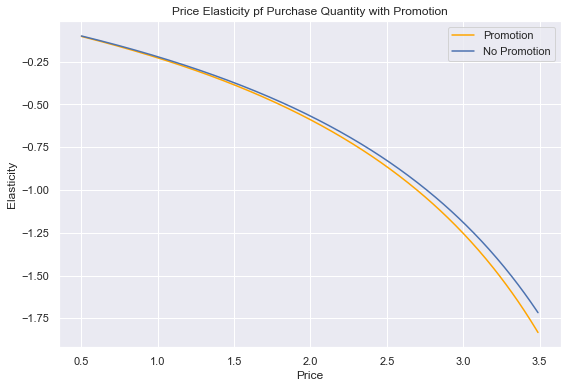

In [123]:
# Plot the two elasticities side by side. 
# We observe that the two elasticities are very close together for almost the entire price range.
# It appears that promotion does not appear to be a significant factor in the customers' decission 
# what quantity of chocolate candy bars to purchase.
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color = 'orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.legend(['Promotion', 'No Promotion'], loc = 1)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')
plt.show()

### 🔶 Insights
- We observe that the two elasticities are very close together for almost the entire price range.
- It appears that promotion does not appear to be a significant factor in the customers' decission what quantity of chocolate candy bars to purchase.

## Improve results

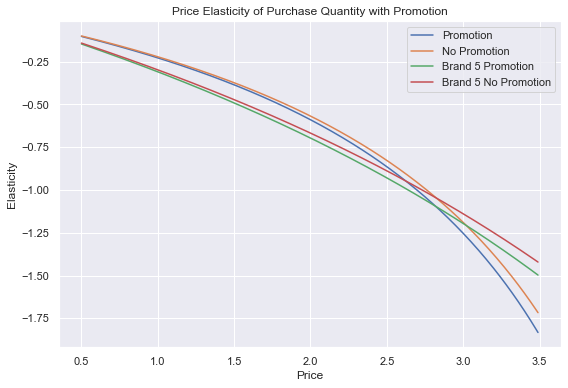

In [126]:
df_purchase_quantity['Price_Incidence_5'] = (df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'])
df_purchase_quantity['Promotion_Incidence_5'] = (df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'])
X = df_purchase_quantity[['Price_Incidence_5', 'Promotion_Incidence_5']]
Y = df_purchase_quantity['Quantity']

model_quantity = LinearRegression()
model_quantity.fit(X, Y)

df_price_elasticity_quantity_5 = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity_5['Price_Incidence_5'] = price_range
df_price_elasticity_quantity_5['Promotion_Incidence_5'] = 1

predict_quantity = model_quantity.predict(df_price_elasticity_quantity_5)
price_elasticity_quantity_promotion_yes_5 = beta_quantity * price_range / predict_quantity

df_price_elasticities['PE_Quantity_Promotion5_1'] = price_elasticity_quantity_promotion_yes_5

df_price_elasticity_quantity_5 = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity_5['Price_Incidence_5'] = price_range
df_price_elasticity_quantity_5['Promotion_Incidence_5'] = 0

predict_quantity = model_quantity.predict(df_price_elasticity_quantity_5)
price_elasticity_quantity_promotion_no_5= beta_quantity * price_range / predict_quantity

df_price_elasticities['PE_Quantity_Promotion5_0'] = price_elasticity_quantity_promotion_no_5

plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.plot(price_range, price_elasticity_quantity_promotion_yes_5)
plt.plot(price_range, price_elasticity_quantity_promotion_no_5)
plt.legend(['Promotion', 'No Promotion','Brand 5 Promotion ', 'Brand 5 No Promotion'], loc = 1)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')
plt.show()